## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [39]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

In [40]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,1,0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,1,0,0,0,1,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,1,0,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,1,0,0,0,1,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,1,0,0,0,1,0,0,0,0


## Look at the histograms for the continuous variables

In [41]:
boston_features_continuous = boston_features[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']]

In [42]:
boston_features_continuous.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,396.90,5.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a176c7828>,
      dtype=object)

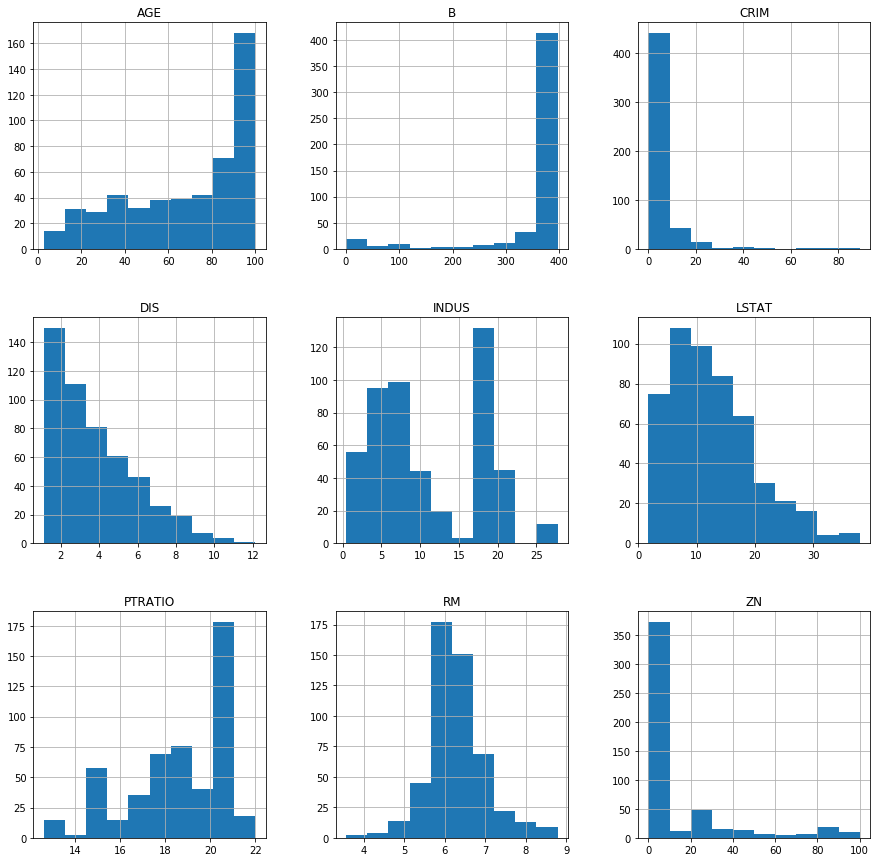

In [43]:
boston_features_continuous.hist(figsize = (15,15))

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [44]:
import numpy as np

In [45]:
boston_log = pd.DataFrame([])
boston_log["logAGE"] = np.log(boston_features_continuous['AGE'])
boston_log["logB"] = np.log(boston_features_continuous['B'])
boston_log["logCRIM"] = np.log(boston_features_continuous['CRIM'])
boston_log["logDIS"] = np.log(boston_features_continuous['DIS'])
boston_log["logINDUS"] = np.log(boston_features_continuous['INDUS'])
boston_log["logLSTAT"] = np.log(boston_features_continuous['LSTAT'])
boston_log["logPTRATIO"] = np.log(boston_features_continuous['PTRATIO'])
boston_log["logRM"] = np.log(boston_features_continuous['RM'])
boston_log["logZN"] = np.log(boston_features_continuous['ZN'])


/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [46]:
boston_log.head()

,logAGE,logB,logCRIM,logDIS,logINDUS,logLSTAT,logPTRATIO,logRM,logZN
0,4.177459,5.983684,-5.064036,1.408545,0.837248,1.605430,2.727853,1.883275,2.890372
1,4.368181,5.983684,-3.600502,1.602836,1.955860,2.212660,2.879198,1.859574,-inf
2,4.112512,5.973377,-3.601235,1.602836,1.955860,1.393766,2.879198,1.971996,-inf
3,3.824284,5.977949,-3.430523,1.802073,0.779325,1.078410,2.928524,1.945624,-inf
4,3.992681,5.983684,-2.672924,1.802073,0.779325,1.673351,2.928524,1.966693,-inf


"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [52]:
boston_log = boston_log.drop(['logZN'], axis = 1)

KeyError: "labels ['logZN'] not contained in axis"

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a192e7390>,
      dtype=object)

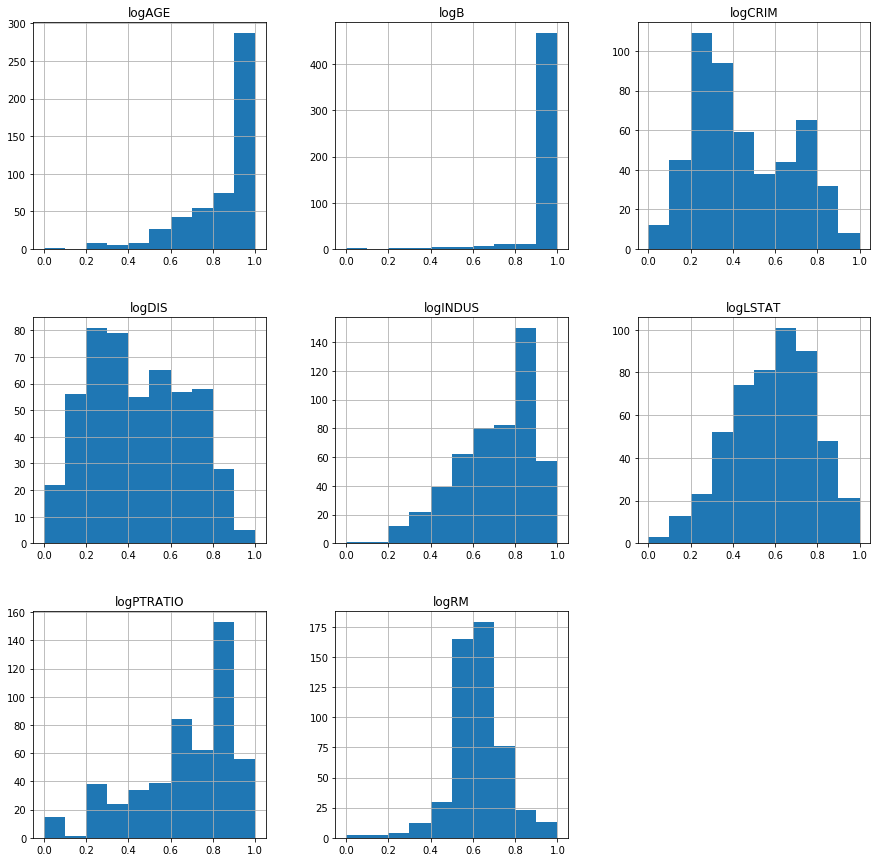

In [53]:
min_max_scaled = pd.DataFrame()
for key in boston_log.keys():
    scaled = (boston_log[key] - min(boston_log[key])) / (max(boston_log[key]) - min(boston_log[key]))
    min_max_scaled[key] = scaled
min_max_scaled.hist(figsize = (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a5f9518>,
      dtype=object)

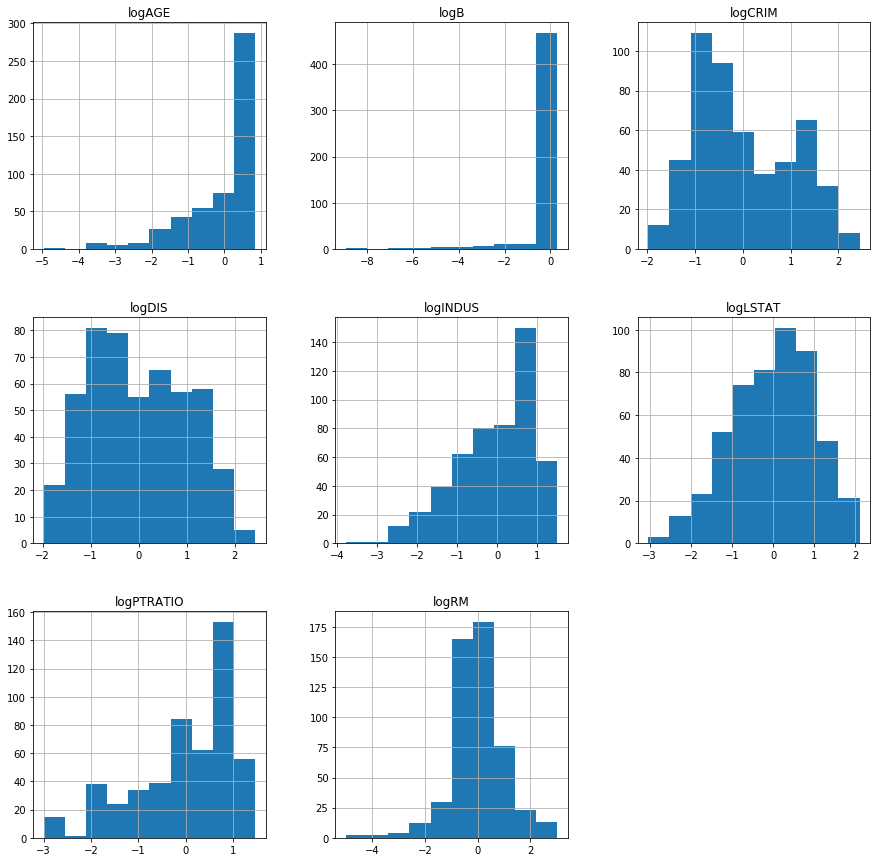

In [56]:
standardized_scaled = pd.DataFrame()
for key in boston_log.keys():
    scaled = (boston_log[key] - boston_log[key].mean()) / (boston_log[key].std())
    standardized_scaled[key] = scaled
standardized_scaled.hist(figsize = (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ad2b8d0>,
      dtype=object)

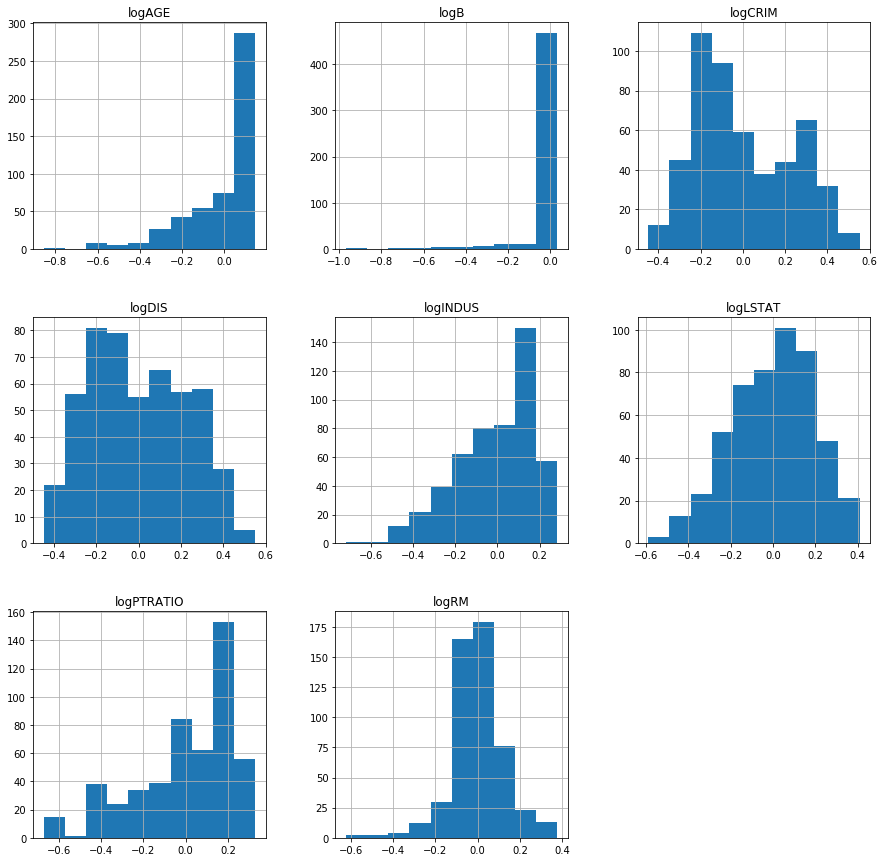

In [57]:
mean_norm_scaled = pd.DataFrame()
for key in boston_log.keys():
    scaled = (boston_log[key] - boston_log[key].mean()) / (max(boston_log[key]) - min(boston_log[key]))
    mean_norm_scaled[key] = scaled
mean_norm_scaled.hist(figsize = (15,15))

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.